# Procesamiento de video

En este cuaderno se toma un video previamente descargado y se hace lo siguiente:  

1) Se extrae Frame a Frame cada imagen y se hace extracción de los rostros con un modelo preentrenado de OpenCv de haarcascade
2) Se hace la clasificación de los rostros con sus emociones
3) Se añade un marco a cada rostro con la etiqueta de  la expresión que clasifica el modelo entrenado.

Esto se hace con el modelo original obtenido de keegle https://www.kaggle.com/code/alanaj007/emotion-detector-optimal y con el entrenado en el proyecto.

Se comienza extrayendo las librerías.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Este código también es basado en funciones, por tanto se crean las funciones que habrán de emplearse al final.

In [5]:
# Crear el diccionario de expresiones acorde al modelo
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Cargar el modelo entrenado en el proyecto
model_trained = tf.keras.models.load_model('./modelos/FER.h5')  # Reemplaza 'your_model_path' con la ruta real hacia tu modelo

# Cargar el modelo entrenado en el proyecto
model_keggle = tf.keras.models.load_model('./modelos/model_optimal_.h5')

# Cargar el clasificador frontal de Haar para la detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion(image, model):
    """
    Predice la emoción en una imagen de entrada.

    Args:
        image: Imagen de entrada.
        model: Modelo utilizado para la predicción.

    Returns:
        str: La emoción predicha.
    """
    img = np.array(image)
    plt.imshow(img)
    print(img.shape)  # Imprime la forma original de la imagen

    # Redimensionar la imagen a (48, 48, 1)
    img = cv2.resize(img, (48, 48))
    img = np.expand_dims(img, axis=-1)  # Añadir una dimensión para el canal (escala de grises)
    img = np.expand_dims(img, axis=0)  # Añadir una dimensión para el lote (batch)

    result = model.predict(img)
    result = list(result[0])
    print(result)

    img_index = result.index(max(result))
    return label_dict[img_index]

def texto(image, model):
    """
    Genera un texto de etiqueta basado en la predicción de emoción en una imagen de rostro.

    Args:
        image: Imagen de entrada.
        model: Modelo utilizado para la predicción.

    Returns:
        str: El texto de etiqueta generado.
    """
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar la función predict_emotion para obtener la etiqueta
    label_text = predict_emotion(gray_image, model)

    # Puedes ajustar el formato del texto de etiqueta según tus necesidades
    label_text = f"{label_text}"

    return label_text

import cv2

def enmarcar_y_etiquetar_caras(video_path, output_path, model):
    """
    Detecta caras en un video, las enmarca y agrega etiquetas a cada cara.

    Args:
        video_path (str): Ruta del video de entrada.
        output_path (str): Ruta del video de salida.
        model: Modelo utilizado para la predicción. 

    Returns:
        None
    """
    # Cargar el video
    video = cv2.VideoCapture(video_path)

    # Obtener el ancho y alto del video
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Crear el objeto para escribir el video de salida
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    output = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

    # Variables para asignar etiquetas a las caras detectadas
    face_counter = 0

    while True:
        # Leer el siguiente fotograma del video
        ret, frame = video.read()

        if not ret:
            break

        # Convertir el fotograma a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detectar caras en el fotograma
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Dibujar un rectángulo alrededor de cada cara y agregar la etiqueta
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Obtener la cara dentro del rectángulo
            face_image = frame[y:y+h, x:x+w]

            # Aplicar la función 'texto' a la cara y obtener la etiqueta
            label_text = texto(face_image, model)

            # Agregar la etiqueta al fotograma
            cv2.putText(frame, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Incrementar el contador de caras
            face_counter += 1

        # Escribir el fotograma en el video de salida
        output.write(frame)

    # Liberar los recursos
    video.release()
    output.release()

    print(f"Video de salida guardado en: {output_path}")




Se emplean las funciones para procesar el video

(213, 213)
1/1 [==============================] - 1s 631ms/step
[0.0, 0.0, 5.770882e-26, 0.0, 0.0, 0.0, 1.0]
(155, 155)
1/1 [==============================] - 0s 70ms/step
[5.601985e-35, 0.0, 9.482768e-06, 0.0, 0.0, 0.0, 0.99999046]
(153, 153)
1/1 [==============================] - 0s 71ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(85, 85)
1/1 [==============================] - 0s 68ms/step
[0.0, 0.0, 1.4222881e-10, 0.0, 0.0, 0.0, 1.0]
(213, 213)
1/1 [==============================] - 0s 71ms/step
[0.0, 4.468082e-31, 3.5388437e-18, 0.0, 0.0, 0.0, 1.0]
(161, 161)
1/1 [==============================] - 0s 196ms/step
[0.0, 0.0, 1.0294063e-11, 0.0, 0.0, 0.0, 1.0]
(153, 153)
1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(83, 83)
1/1 [==============================] - 0s 116ms/step
[0.0, 0.0, 2.2522565e-13, 0.0, 0.0, 0.0, 1.0]
(210, 210)
1/1 [==============================] - 0s 65ms/step
[0.0, 1.3216277e-26, 2.5395825e-14, 0.0, 0.0, 0.0, 1.0]
(155, 1

1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 3.8209677e-15, 0.0, 0.0, 0.0, 1.0]
(149, 149)
1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 4.8361414e-25, 0.0, 0.0, 0.0, 1.0]
(150, 150)
1/1 [==============================] - 0s 106ms/step
[0.0, 0.0, 9.909206e-16, 0.0, 0.0, 0.0, 1.0]
(160, 160)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 0.060259234, 0.0, 0.0, 0.0, 0.9397408]
(152, 152)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 3.838663e-06, 0.0, 0.0, 0.0, 0.9999962]
(148, 148)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.0, 5.2443926e-12, 0.0, 0.0, 0.0, 1.0]
(146, 146)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 4.1647355e-19, 0.0, 0.0, 0.0, 1.0]
(145, 145)
1/1 [==============================] - 0s 73ms/step
[0.0, 0.0, 6.206945e-14, 0.0, 0.0, 0.0, 1.0]
(87, 87)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.0, 3.664522e-16, 0.0, 0.0, 0.0, 1.0]
(145, 145)
1/1 [=========

(157, 157)
1/1 [==============================] - 0s 56ms/step
[0.0, 5.311289e-29, 1.9951635e-25, 0.0, 0.0, 0.0, 1.0]
(188, 188)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(59, 59)
1/1 [==============================] - 0s 79ms/step
[0.0, 2.463124e-33, 9.133446e-18, 0.0, 0.0, 0.0, 1.0]
(153, 153)
1/1 [==============================] - 0s 71ms/step
[0.0, 0.0, 1.7637242e-32, 0.0, 0.0, 0.0, 1.0]
(159, 159)
1/1 [==============================] - 0s 72ms/step
[0.0, 2.77101e-28, 2.0054626e-27, 0.0, 0.0, 0.0, 1.0]
(187, 187)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(54, 54)
1/1 [==============================] - 0s 56ms/step
[0.0, 6.4393656e-31, 5.2035696e-16, 0.0, 0.0, 0.0, 1.0]
(166, 166)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 2.679727e-13, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 50ms/step
[0.0, 4.1075127e-25, 1.3961697e-30, 0.0, 0.0, 0.0, 1.0]

1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.3472274e-12]
(106, 106)
1/1 [==============================] - 0s 72ms/step
[0.0, 0.99990475, 7.215425e-34, 0.0, 0.0, 0.0, 9.519035e-05]
(68, 68)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 2.8043046e-13, 0.0, 0.0, 0.0, 1.0]
(135, 135)
1/1 [==============================] - 0s 69ms/step
[3.095803e-29, 0.0, 1.3327201e-11, 0.0, 0.0, 0.0, 1.0]
(163, 163)
1/1 [==============================] - 0s 77ms/step
[2.3409907e-38, 0.0, 1.9936256e-11, 0.0, 0.0, 0.0, 1.0]
(206, 206)
1/1 [==============================] - 0s 53ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.534445e-36]
(66, 66)
1/1 [==============================] - 0s 63ms/step
[0.0, 0.0, 2.8409286e-10, 0.0, 0.0, 0.0, 1.0]
(93, 93)
1/1 [==============================] - 0s 93ms/step
[0.0, 0.0, 6.5291776e-09, 0.0, 0.0, 0.0, 1.0]
(145, 145)
1/1 [==============================] - 0s 337ms/step
[1.23683155e-30, 0.0, 1.7339447e-05, 0.0, 0.0, 0

(151, 151)
1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 2.2274775e-36, 0.0, 0.0, 0.0, 1.0]
(168, 168)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.9999926, 6.8222053e-35, 0.0, 0.0, 0.0, 7.3822735e-06]
(63, 63)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0532798e-18]
(151, 151)
1/1 [==============================] - 0s 51ms/step
[3.8159597e-36, 0.0, 2.685447e-21, 0.0, 0.0, 0.0, 1.0]
(160, 160)
1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.8995115e-35]
(60, 60)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 8.609462e-09]
(160, 160)
1/1 [==============================] - 0s 88ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 5.717623e-30, 0.0, 0.0, 0.0, 1.0]
(158, 158)
1/1 [==============================] - 0s 79ms/step
[0.0, 0.0, 1.2827972e-29, 0.0, 0.0, 0.0, 1.0]
(167, 167)

1/1 [==============================] - 0s 93ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.264549e-15]
(60, 60)
1/1 [==============================] - 0s 78ms/step
[5.9022458e-34, 0.0, 0.026819551, 1.8086044e-34, 0.0, 0.0, 0.9731804]
(182, 182)
1/1 [==============================] - 0s 76ms/step
[1.1801671e-32, 5.7010185e-18, 1.0590039e-12, 0.0, 0.0, 0.0, 1.0]
(152, 152)
1/1 [==============================] - 0s 75ms/step
[0.0, 0.0, 3.857658e-21, 0.0, 0.0, 0.0, 1.0]
(128, 128)
1/1 [==============================] - 0s 70ms/step
[2.1667925e-30, 4.7603794e-14, 0.99916995, 0.0, 0.0, 0.0, 0.00083005725]
(83, 83)
1/1 [==============================] - 0s 71ms/step
[0.0, 0.0, 4.208972e-21, 0.0, 0.0, 0.0, 1.0]
(191, 191)
1/1 [==============================] - 0s 110ms/step
[0.0, 1.0541751e-35, 1.397134e-15, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 130ms/step
[0.0, 0.0, 1.3127841e-26, 0.0, 0.0, 0.0, 1.0]
(135, 135)
1/1 [==============================] - 0s 89ms/step
[

1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 3.2634197e-11, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 86ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.9542884e-32]
(228, 228)
1/1 [==============================] - 0s 138ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 83ms/step
[5.477316e-37, 0.0, 1.5454551e-14, 0.0, 0.0, 0.0, 1.0]
(132, 132)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.9999958, 9.834273e-29, 0.0, 0.0, 0.0, 4.1570474e-06]
(87, 87)
1/1 [==============================] - 0s 152ms/step
[0.0, 0.0, 1.8616734e-14, 0.0, 0.0, 0.0, 1.0]
(208, 208)
1/1 [==============================] - 0s 138ms/step
[0.0, 3.923836e-29, 0.0, 0.0, 0.0, 0.0, 1.0]
(142, 142)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 2.199031e-16, 0.0, 0.0, 0.0, 1.0]
(53, 53)
1/1 [==============================] - 0s 71ms/step
[0.0, 3.462195e-33, 0.0005919729, 0.0, 0.0, 0.0, 0.999408]
(130, 

1/1 [==============================] - 0s 68ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0818606e-27]
(147, 147)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 2.3743887e-12, 0.0, 0.0, 0.0, 1.0]
(130, 130)
1/1 [==============================] - 0s 65ms/step
[1.04382716e-32, 0.00042745675, 0.046963826, 2.757128e-22, 0.0, 0.0, 0.95260876]
(146, 146)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 2.1183104e-21, 0.0, 0.0, 0.0, 1.0]
(131, 131)
1/1 [==============================] - 0s 61ms/step
[2.2730514e-34, 3.6794248e-17, 0.53012246, 3.706911e-32, 0.0, 0.0, 0.4698775]
(138, 138)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.02160404, 1.9177865e-21, 0.0, 0.0, 0.0, 0.9783959]
(149, 149)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 7.2086986e-30, 0.0, 0.0, 0.0, 1.0]
(130, 130)
1/1 [==============================] - 0s 53ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.2679276e-27]
(149, 149)
1/1 [==============================] - 0s 62ms/s

1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 5.2579167e-11, 0.0, 0.0, 0.0, 1.0]
(143, 143)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 3.5627175e-14, 0.0, 0.0, 0.0, 1.0]
(125, 125)
1/1 [==============================] - 0s 61ms/step
[0.0, 1.765653e-28, 1.097454e-11, 0.0, 0.0, 0.0, 1.0]
(85, 85)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 4.1989013e-21, 0.0, 0.0, 0.0, 1.0]
(53, 53)
1/1 [==============================] - 0s 53ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0335386e-25]
(146, 146)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 1.5087287e-13, 0.0, 0.0, 0.0, 1.0]
(128, 128)
1/1 [==============================] - 0s 56ms/step
[0.0, 8.5109133e-07, 1.2600344e-23, 0.0, 0.0, 0.0, 0.99999917]
(82, 82)
1/1 [==============================] - 0s 64ms/step
[0.0, 0.0, 2.5518328e-18, 0.0, 0.0, 0.0, 1.0]
(55, 55)
1/1 [==============================] - 0s 57ms/step
[0.0, 1.0, 4.915585e-38, 0.0, 0.0, 0.0, 8.550728e-20]
(145,

1/1 [==============================] - 0s 55ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.6382797e-26]
(86, 86)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 8.863135e-14, 0.0, 0.0, 0.0, 1.0]
(147, 147)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 1.1959636e-13, 0.0, 0.0, 0.0, 1.0]
(171, 171)
1/1 [==============================] - 0s 53ms/step
[0.0, 6.1352044e-33, 1.5190247e-14, 0.0, 0.0, 0.0, 1.0]
(132, 132)
1/1 [==============================] - 0s 52ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(83, 83)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 2.0909051e-06, 0.0, 0.0, 0.0, 0.99999785]
(161, 161)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 6.099138e-15, 0.0, 0.0, 0.0, 1.0]
(146, 146)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 4.2264913e-22, 0.0, 0.0, 0.0, 1.0]
(131, 131)
1/1 [==============================] - 0s 64ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(57, 57)
1/1 [=========================

(147, 147)
1/1 [==============================] - 0s 55ms/step
[1.3133346e-30, 0.0, 0.017857566, 0.0, 0.0, 0.0, 0.9821424]
(128, 128)
1/1 [==============================] - 0s 61ms/step
[6.906854e-24, 0.700343, 0.2915324, 7.166863e-30, 0.0, 0.0, 0.008124547]
(80, 80)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 1.0438227e-13, 0.0, 0.0, 0.0, 1.0]
(144, 144)
1/1 [==============================] - 0s 58ms/step
[1.6530814e-33, 0.0, 0.04231531, 0.0, 0.0, 0.0, 0.95768464]
(130, 130)
1/1 [==============================] - 0s 63ms/step
[0.0, 1.0, 5.3110504e-20, 0.0, 0.0, 0.0, 1.8290476e-20]
(80, 80)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 5.319676e-17, 0.0, 0.0, 0.0, 1.0]
(156, 156)
1/1 [==============================] - 0s 56ms/step
[2.1996438e-38, 7.7226116e-35, 3.0160882e-10, 0.0, 0.0, 0.0, 1.0]
(130, 130)
1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 2.4765688e-18, 0.0, 0.0, 0.0, 8.679582e-21]
(134, 134)
1/1 [=======================

(158, 158)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 0.9999963, 0.0, 0.0, 0.0, 3.7220932e-06]
(128, 128)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.019943357, 1.4156195e-11, 0.0, 0.0, 0.0, 0.9800567]
(80, 80)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 2.4153184e-17, 0.0, 0.0, 0.0, 1.0]
(143, 143)
1/1 [==============================] - 0s 53ms/step
[0.0, 5.0855918e-30, 7.7052183e-13, 0.0, 0.0, 0.0, 1.0]
(131, 131)
1/1 [==============================] - 0s 57ms/step
[0.0, 3.6248773e-12, 3.257333e-14, 0.0, 0.0, 0.0, 1.0]
(129, 129)
1/1 [==============================] - 0s 55ms/step
[0.0, 2.6650346e-07, 1.02803156e-13, 0.0, 0.0, 0.0, 0.99999976]
(78, 78)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 2.3438834e-10, 0.0, 0.0, 0.0, 1.0]
(125, 125)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0011599069, 2.3195332e-13, 0.0, 0.0, 0.0, 0.99884015]
(128, 128)
1/1 [==============================] - 0s 53ms/s

1/1 [==============================] - 0s 61ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(70, 70)
1/1 [==============================] - 0s 64ms/step
[0.0, 3.1989412e-28, 3.7725078e-22, 0.0, 0.0, 0.0, 1.0]
(208, 208)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 1.43776265e-27, 0.0, 0.0, 0.0, 1.0]
(139, 139)
1/1 [==============================] - 0s 94ms/step
[0.0, 0.0, 1.1546439e-21, 0.0, 0.0, 0.0, 1.0]
(150, 150)
1/1 [==============================] - 0s 69ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(91, 91)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 1.7019374e-18, 0.0, 0.0, 0.0, 1.0]
(210, 210)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 2.3742812e-26, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 3.513505e-16, 0.0, 0.0, 0.0, 1.0]
(147, 147)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(217, 217)
1/1 [==============================] - 0s 6

1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 1.5263792e-28, 0.0, 0.0, 0.0, 1.0]
(164, 164)
1/1 [==============================] - 0s 58ms/step
[0.0, 1.0, 7.268752e-24, 0.0, 0.0, 0.0, 5.157119e-13]
(218, 218)
1/1 [==============================] - 0s 63ms/step
[0.0, 2.404673e-24, 1.0687504e-30, 0.0, 0.0, 0.0, 1.0]
(152, 152)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 1.0030276e-19, 0.0, 0.0, 0.0, 1.0]
(166, 166)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(223, 223)
1/1 [==============================] - 0s 54ms/step
[0.0, 2.3221273e-37, 5.038688e-22, 0.0, 0.0, 0.0, 1.0]
(149, 149)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 6.5830226e-24, 0.0, 0.0, 0.0, 1.0]
(168, 168)
1/1 [==============================] - 0s 53ms/step
[0.0, 1.0, 2.3213126e-37, 0.0, 0.0, 0.0, 2.1505972e-18]
(58, 58)
1/1 [==============================] - 0s 52ms/step
[0.0, 3.634298e-05, 6.7817036e-15, 0.0, 0.0, 0.0, 0.

1/1 [==============================] - 0s 57ms/step
[3.1051372e-35, 0.0, 5.100365e-12, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 59ms/step
[0.0, 2.7886964e-14, 2.280334e-22, 0.0, 0.0, 0.0, 1.0]
(57, 57)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.9999999, 0.0, 0.0, 0.0, 6.869591e-08]
(210, 210)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 3.089079e-29, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 63ms/step
[3.542894e-34, 0.0, 5.1535172e-14, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 53ms/step
[0.0, 2.5508849e-21, 2.9083452e-24, 0.0, 0.0, 0.0, 1.0]
(54, 54)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.00053844275, 0.0, 0.0, 0.0, 0.9994616]
(207, 207)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 1.0287005e-32, 0.0, 0.0, 0.0, 1.0]
(144, 144)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 1.3376406e-18, 0.0, 0.

[0.0, 0.0, 1.4393332e-18, 0.0, 0.0, 0.0, 1.0]
(214, 214)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 1.1904548e-15, 0.0, 0.0, 0.0, 1.0]
(141, 141)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 1.8965246e-21, 0.0, 0.0, 0.0, 1.0]
(216, 216)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(145, 145)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 9.005624e-15, 0.0, 0.0, 0.0, 1.0]
(61, 61)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 0.9999995, 0.0, 0.0, 0.0, 4.2993238e-07]
(219, 219)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 4.9578678e-21, 0.0, 0.0, 0.0, 1.0]
(142, 142)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 1.5964714e-16, 0.0, 0.0, 0.0, 1.0]
(59, 59)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 0.99999774, 0.0, 0.0, 0.0, 2.2535744e-06]
(217, 217)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 3.8135624e

1/1 [==============================] - 0s 54ms/step
[1.9991016e-29, 1.994836e-06, 5.3763265e-14, 0.0, 0.0, 0.0, 0.999998]
(62, 62)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.5518002e-18]
(218, 218)
1/1 [==============================] - 0s 58ms/step
[3.0851088e-30, 1.2266483e-21, 6.8125154e-09, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 5.4402706e-22, 0.0, 0.0, 0.0, 1.0]
(66, 66)
1/1 [==============================] - 0s 63ms/step
[1.5632666e-37, 0.0, 1.0, 0.0, 0.0, 0.0, 1.9312967e-15]
(72, 72)
1/1 [==============================] - 0s 60ms/step
[1.4202266e-29, 0.4782471, 7.920538e-15, 0.0, 0.0, 0.0, 0.52175295]
(67, 67)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.2361029e-15]
(214, 214)
1/1 [==============================] - 0s 60ms/step
[2.9780453e-29, 2.6665585e-16, 1.1446868e-09, 0.0, 0.0, 0.0, 1.0]
(142, 142)
1/1 [==============================] - 0

1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 5.8679888e-08, 0.0, 0.0, 0.0, 1.0]
(207, 207)
1/1 [==============================] - 0s 53ms/step
[2.2185371e-38, 9.024533e-31, 9.223377e-14, 0.0, 0.0, 0.0, 1.0]
(145, 145)
1/1 [==============================] - 0s 54ms/step
[3.3586213e-34, 0.0, 2.8225683e-15, 0.0, 0.0, 0.0, 1.0]
(161, 161)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(54, 54)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.9999956, 0.0, 0.0, 0.0, 4.447831e-06]
(85, 85)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.211687e-10]
(213, 213)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0026265928, 2.7948982e-23, 0.0, 0.0, 0.0, 0.99737346]
(143, 143)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 1.6157531e-15, 0.0, 0.0, 0.0, 1.0]
(165, 165)
1/1 [==============================] - 0s 79ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.6775412e-

1/1 [==============================] - 0s 56ms/step
[0.0, 3.2676983e-15, 2.046267e-18, 0.0, 0.0, 0.0, 1.0]
(149, 149)
1/1 [==============================] - 0s 62ms/step
[5.4412464e-37, 0.0, 2.0082376e-16, 0.0, 0.0, 0.0, 1.0]
(210, 210)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.9922977e-31, 5.112995e-17, 0.0, 0.0, 0.0, 1.0]
(164, 164)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 1.9329119e-14, 0.0, 0.0, 0.0, 1.0]
(57, 57)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.4388503e-09]
(153, 153)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 2.1396433e-15, 0.0, 0.0, 0.0, 1.0]
(207, 207)
1/1 [==============================] - 0s 64ms/step
[0.0, 6.789117e-16, 1.001459e-21, 0.0, 0.0, 0.0, 1.0]
(170, 170)
1/1 [==============================] - 0s 71ms/step
[2.5787197e-36, 3.5205649e-37, 6.6342895e-12, 0.0, 0.0, 0.0, 1.0]
(215, 215)
1/1 [==============================] - 0s 57ms/step
[0.0, 3.7949357e-38, 1

1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(58, 58)
1/1 [==============================] - 0s 53ms/step
[5.6522814e-38, 2.156023e-14, 9.929217e-17, 0.0, 0.0, 0.0, 1.0]
(170, 170)
1/1 [==============================] - 0s 63ms/step
[3.4216133e-26, 1.0271169e-16, 3.022472e-08, 0.0, 0.0, 0.0, 1.0]
(61, 61)
1/1 [==============================] - 0s 50ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.6251168e-09]
(178, 178)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.4679506e-34]
(194, 194)
1/1 [==============================] - 0s 57ms/step
[0.0, 2.5745602e-30, 2.3226595e-14, 0.0, 0.0, 0.0, 1.0]
(169, 169)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 5.528062e-18, 0.0, 0.0, 0.0, 1.0]
(52, 52)
1/1 [==============================] - 0s 62ms/step
[0.0, 0.0, 1.2164603e-16, 0.0, 0.0, 0.0, 1.0]
(178, 178)
1/1 [==============================] - 0s 73ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.2979821e-30]


1/1 [==============================] - 0s 64ms/step
[1.0622253e-33, 5.4242027e-25, 6.2355583e-09, 0.0, 0.0, 0.0, 1.0]
(58, 58)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 0.93727714, 0.0, 0.0, 0.0, 0.062722795]
(176, 176)
1/1 [==============================] - 0s 56ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(159, 159)
1/1 [==============================] - 0s 63ms/step
[0.0, 0.0, 2.3423491e-15, 0.0, 0.0, 0.0, 1.0]
(207, 207)
1/1 [==============================] - 0s 94ms/step
[5.3817994e-35, 9.502296e-30, 4.8306337e-08, 0.0, 0.0, 0.0, 1.0]
(180, 180)
1/1 [==============================] - 0s 57ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.905383e-09]
(157, 157)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(212, 212)
1/1 [==============================] - 0s 71ms/step
[3.0667878e-34, 9.086853e-32, 3.2118548e-06, 3.631666e-32, 0.0, 0.0, 0.9999968]
(176, 176)
1/1 [==============================] - 0s 60ms/step
[0.0, 1.1205038e-35, 

1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 58ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(166, 166)
1/1 [==============================] - 0s 66ms/step
[0.0, 7.298929e-31, 0.0, 0.0, 0.0, 0.0, 1.0]
(172, 172)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 61ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.9607465e-26]
(177, 177)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(199, 199)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 60ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.6113095e-22]
(138, 138)
1/1 [==============================] - 0s 63ms/step
[0.0, 0.0, 2.1606567e-08, 0.0, 0.0, 0.0, 1.0]
(173, 173)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 0.0, 0.

(164, 164)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 2.0080696e-23, 0.0, 0.0, 0.0, 1.0]
(137, 137)
1/1 [==============================] - 0s 56ms/step
[0.0, 3.039201e-16, 0.0, 0.0, 0.0, 0.0, 1.0]
(203, 203)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 2.3120927e-24, 0.0, 0.0, 0.0, 1.0]
(52, 52)
1/1 [==============================] - 0s 60ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(63, 63)
1/1 [==============================] - 0s 57ms/step
[7.2037755e-38, 3.0059382e-15, 3.0102988e-15, 0.0, 0.0, 0.0, 1.0]
(160, 160)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 5.709129e-28, 0.0, 0.0, 0.0, 1.0]
(213, 213)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.0, 3.7375787e-33, 0.0, 0.0, 0.0, 1.0]
(136, 136)
1/1 [==============================] - 0s 55ms/step
[0.0, 2.0271821e-36, 0.0, 0.0, 0.0, 0.0, 1.0]
(53, 53)
1/1 [==============================] - 0s 54ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(168, 168)
1/1 [===========

1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 5.533368e-22, 0.0, 0.0, 0.0, 1.0]
(144, 144)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(59, 59)
1/1 [==============================] - 0s 55ms/step
[0.0, 9.817053e-33, 8.331559e-26, 0.0, 0.0, 0.0, 1.0]
(93, 93)
1/1 [==============================] - 0s 52ms/step
[4.600643e-34, 0.0, 0.97384983, 0.0, 0.0, 0.0, 0.026150176]
(211, 211)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(140, 140)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 1.26477414e-23, 0.0, 0.0, 0.0, 1.0]
(127, 127)
1/1 [==============================] - 0s 55ms/step
[0.0, 0.0, 4.1124157e-12, 0.0, 0.0, 0.0, 1.0]
(61, 61)
1/1 [==============================] - 0s 60ms/step
[0.0, 1.5227783e-29, 9.428049e-25, 0.0, 0.0, 0.0, 1.0]
(91, 91)
1/1 [==============================] - 0s 53ms/step
[7.6877514e-35, 0.0, 0.9998779, 0.0, 0.0, 0.0, 0.00012205023]
(207, 207)


1/1 [==============================] - 0s 66ms/step
[1.2979342e-38, 0.0, 0.6559596, 0.0, 0.0, 0.0, 0.34404045]
(199, 199)
1/1 [==============================] - 0s 54ms/step
[0.0, 4.866921e-24, 7.2105594e-25, 0.0, 0.0, 0.0, 1.0]
(141, 141)
1/1 [==============================] - 0s 71ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.1171838e-19]
(152, 152)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 1.0747721e-31, 0.0, 0.0, 0.0, 1.0]
(192, 192)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.99999726, 1.5639348e-24, 0.0, 0.0, 0.0, 2.6905564e-06]
(58, 58)
1/1 [==============================] - 0s 53ms/step
[3.627062e-35, 3.3942767e-32, 2.1472449e-10, 0.0, 0.0, 0.0, 1.0]
(141, 141)
1/1 [==============================] - 0s 52ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(55, 55)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 0.61505175, 0.0, 0.0, 0.0, 0.38494828]
(142, 142)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 1.2099945e-24, 0.

1/1 [==============================] - 0s 56ms/step
[0.0, 8.405459e-34, 1.1108183e-26, 0.0, 0.0, 0.0, 1.0]
(162, 162)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 1.207446e-37, 0.0, 0.0, 0.0, 1.0]
(228, 228)
1/1 [==============================] - 0s 55ms/step
[0.0, 1.0212022e-23, 1.3037508e-19, 0.0, 0.0, 0.0, 1.0]
(56, 56)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.9999956, 0.0, 0.0, 0.0, 4.356348e-06]
(145, 145)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 4.124839e-29, 0.0, 0.0, 0.0, 1.0]
(224, 224)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.8253193, 3.1232476e-26, 0.0, 0.0, 0.0, 0.17468068]
(147, 147)
1/1 [==============================] - 0s 74ms/step
[0.0, 0.0, 1.5095715e-25, 0.0, 0.0, 0.0, 1.0]
(107, 107)
1/1 [==============================] - 0s 54ms/step
[0.0, 1.0291632e-18, 5.9257923e-33, 0.0, 0.0, 0.0, 1.0]
(214, 214)
1/1 [==============================] - 0s 54ms/step
[9.669586e-38, 1.4708464e-29, 5.1

(246, 246)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.9999387, 2.9493856e-21, 0.0, 0.0, 0.0, 6.1282735e-05]
(134, 134)
1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(66, 66)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 0.99993753, 0.0, 0.0, 0.0, 6.248182e-05]
(247, 247)
1/1 [==============================] - 0s 66ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.1307173e-24]
(54, 54)
1/1 [==============================] - 0s 61ms/step
[4.599666e-35, 0.00023977463, 2.8791008e-12, 0.0, 0.0, 0.0, 0.9997602]
(139, 139)
1/1 [==============================] - 0s 65ms/step
[0.0, 1.723741e-33, 5.0977393e-27, 0.0, 0.0, 0.0, 1.0]
(60, 60)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6.881935e-11]
(226, 226)
1/1 [==============================] - 0s 67ms/step
[0.0, 1.0, 5.062526e-35, 0.0, 0.0, 0.0, 1.6853186e-13]
(58, 58)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 1.0, 0.0

(226, 226)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.9999969, 1.0116247e-33, 0.0, 0.0, 0.0, 3.1434186e-06]
(56, 56)
1/1 [==============================] - 0s 56ms/step
[0.0, 0.0, 0.9999995, 0.0, 0.0, 0.0, 4.2227344e-07]
(121, 121)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 4.6365646e-30, 0.0, 0.0, 0.0, 1.0]
(223, 223)
1/1 [==============================] - 0s 53ms/step
[0.0, 2.0847885e-06, 2.1011254e-27, 0.0, 0.0, 0.0, 0.999998]
(56, 56)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 0.9997187, 0.0, 0.0, 0.0, 0.00028119583]
(121, 121)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 1.6628969e-28, 0.0, 0.0, 0.0, 1.0]
(223, 223)
1/1 [==============================] - 0s 53ms/step
[0.0, 9.725871e-12, 1.0765221e-20, 0.0, 0.0, 0.0, 1.0]
(58, 58)
1/1 [==============================] - 0s 62ms/step
[0.0, 0.0, 0.9999999, 0.0, 0.0, 0.0, 8.7049386e-08]
(223, 223)
1/1 [==============================] - 0s 54ms/step
[0.0, 1.52495

[0.0, 0.0, 3.729744e-26, 0.0, 0.0, 0.0, 1.0]
(57, 57)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 0.9999964, 0.0, 0.0, 0.0, 3.5216422e-06]
(151, 151)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 2.9441196e-25, 0.0, 0.0, 0.0, 1.0]
(218, 218)
1/1 [==============================] - 0s 57ms/step
[0.0, 1.9371909e-09, 2.0015709e-21, 0.0, 0.0, 0.0, 1.0]
(56, 56)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 0.9999999, 0.0, 0.0, 0.0, 7.7673e-08]
(152, 152)
1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 2.9765445e-15, 0.0, 0.0, 0.0, 1.0]
(216, 216)
1/1 [==============================] - 0s 57ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.14815015e-32]
(55, 55)
1/1 [==============================] - 0s 66ms/step
[0.0, 0.0, 0.99999833, 0.0, 0.0, 0.0, 1.609698e-06]
(149, 149)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 2.3613125e-17, 0.0, 0.0, 0.0, 1.0]
(214, 214)
1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 70ms/step
[7.11839e-36, 3.326343e-23, 1.3330499e-12, 0.0, 0.0, 0.0, 1.0]
(130, 130)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(58, 58)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.858312e-10]
(147, 147)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 5.3669603e-26, 0.0, 0.0, 0.0, 1.0]
(233, 233)
1/1 [==============================] - 0s 62ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.4978344e-38]
(128, 128)
1/1 [==============================] - 0s 62ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(148, 148)
1/1 [==============================] - 0s 56ms/step
[0.0, 8.93765e-31, 4.568796e-21, 0.0, 0.0, 0.0, 1.0]
(216, 216)
1/1 [==============================] - 0s 78ms/step
[0.0, 0.79947656, 1.3567114e-23, 0.0, 0.0, 0.0, 0.20052344]
(129, 129)
1/1 [==============================] - 0s 72ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(234, 234)
1/1 [=========

1/1 [==============================] - 0s 68ms/step
[0.0, 0.0, 0.82737744, 0.0, 0.0, 0.0, 0.17262249]
(232, 232)
1/1 [==============================] - 0s 61ms/step
[5.5665974e-37, 0.9999869, 3.800301e-17, 0.0, 0.0, 0.0, 1.3157038e-05]
(53, 53)
1/1 [==============================] - 0s 60ms/step
[0.0, 0.0, 1.7666756e-07, 0.0, 0.0, 0.0, 0.9999999]
(232, 232)
1/1 [==============================] - 0s 62ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.1294182e-27]
(137, 137)
1/1 [==============================] - 0s 59ms/step
[0.0, 7.5842093e-25, 3.0689955e-13, 0.0, 0.0, 0.0, 1.0]
(57, 57)
1/1 [==============================] - 0s 61ms/step
[0.0, 0.0, 0.9999616, 0.0, 0.0, 0.0, 3.8402162e-05]
(241, 241)
1/1 [==============================] - 0s 67ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.08875154e-26]
(55, 55)
1/1 [==============================] - 0s 75ms/step
[0.0, 7.502638e-08, 1.5801575e-20, 0.0, 0.0, 0.0, 0.9999999]
(136, 136)
1/1 [==============================] - 0s 59ms/step
[1.7408469e-34,

(148, 148)
1/1 [==============================] - 0s 72ms/step
[0.0, 0.0, 8.103828e-34, 0.0, 0.0, 0.0, 1.0]
(132, 132)
1/1 [==============================] - 0s 59ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.4704933e-38]
(153, 153)
1/1 [==============================] - 0s 54ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
(141, 141)
1/1 [==============================] - 0s 69ms/step
[0.0, 1.315891e-21, 3.7547824e-19, 0.0, 0.0, 0.0, 1.0]
(142, 142)
1/1 [==============================] - 0s 53ms/step
[0.0, 4.2724007e-36, 8.072661e-20, 0.0, 0.0, 0.0, 1.0]
(136, 136)
1/1 [==============================] - 0s 76ms/step
[0.0, 1.0, 2.553287e-38, 0.0, 0.0, 0.0, 1.1342103e-11]
(138, 138)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 7.517836e-27, 0.0, 0.0, 0.0, 1.0]
(122, 122)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 4.8984476e-27, 0.0, 0.0, 0.0, 1.0]
(126, 126)
1/1 [==============================] - 0s 59ms/step
[0.0, 0.0, 2.2488196e-38, 0.0, 0.0, 0.0, 1.0]
(122

1/1 [==============================] - 0s 57ms/step
[0.0, 2.7027123e-21, 2.0568425e-08, 0.0, 0.0, 0.0, 1.0]
(135, 135)
1/1 [==============================] - 0s 60ms/step
[0.0, 3.090205e-10, 2.74081e-18, 0.0, 0.0, 0.0, 1.0]
(154, 154)
1/1 [==============================] - 0s 57ms/step
[0.0, 0.0, 2.3046747e-12, 0.0, 0.0, 0.0, 1.0]
(135, 135)
1/1 [==============================] - 0s 62ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.7242785e-35]
(65, 65)
1/1 [==============================] - 0s 58ms/step
[0.0, 0.0, 3.253603e-05, 0.0, 0.0, 0.0, 0.99996746]
(138, 138)
1/1 [==============================] - 0s 56ms/step
[0.0, 4.5558567e-17, 2.6296943e-26, 0.0, 0.0, 0.0, 1.0]
(65, 65)
1/1 [==============================] - 0s 69ms/step
[0.0, 0.0, 6.299483e-06, 0.0, 0.0, 0.0, 0.9999937]
(157, 157)
1/1 [==============================] - 0s 57ms/step
[0.0, 3.57395e-20, 8.8453644e-30, 0.0, 0.0, 0.0, 1.0]
(138, 138)
1/1 [==============================] - 0s 61ms/step
[0.0, 1.0, 4.8983453e-23, 0.0, 0.0

1/1 [==============================] - 0s 76ms/step
[0.0, 0.9566374, 1.6897741e-19, 0.0, 0.0, 0.0, 0.043362636]
(66, 66)
1/1 [==============================] - 0s 78ms/step
[0.0, 0.0, 0.99960166, 0.0, 0.0, 0.0, 0.00039834066]
(121, 121)
1/1 [==============================] - 0s 106ms/step
[0.0, 6.5304414e-26, 9.795904e-13, 0.0, 0.0, 0.0, 1.0]
(135, 135)
1/1 [==============================] - 0s 70ms/step
[0.0, 5.967168e-33, 0.0, 0.0, 0.0, 0.0, 1.0]
(64, 64)
1/1 [==============================] - 0s 64ms/step
[0.0, 0.0, 0.997829, 0.0, 0.0, 0.0, 0.0021709173]
(143, 143)
1/1 [==============================] - 0s 65ms/step
[0.0, 2.1986892e-29, 5.6320293e-30, 0.0, 0.0, 0.0, 1.0]
(133, 133)
1/1 [==============================] - 0s 76ms/step
[0.0, 1.2212562e-20, 2.879199e-19, 0.0, 0.0, 0.0, 1.0]
(57, 57)
1/1 [==============================] - 0s 72ms/step
[0.0, 0.0, 0.9863223, 0.0, 0.0, 0.0, 0.01367774]
(60, 60)
1/1 [==============================] - 0s 68ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.

(153, 153)
1/1 [==============================] - 0s 56ms/step
[1.0, 0.0, 6.701995e-14, 0.0, 0.0, 2.8015597e-26, 0.0]
(237, 237)
1/1 [==============================] - 0s 63ms/step
[7.5147174e-05, 0.0, 0.9999249, 0.0, 0.0, 0.0, 0.0]
(152, 152)
1/1 [==============================] - 0s 62ms/step
[5.9742597e-06, 0.0, 0.97205013, 0.0, 0.0, 0.027943866, 0.0]
(151, 151)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 1.845027e-18, 0.0, 0.0, 3.1741341e-34, 0.0]
(228, 228)
1/1 [==============================] - 0s 71ms/step
[5.8280122e-08, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(153, 153)
1/1 [==============================] - 0s 63ms/step
[0.026613407, 0.0, 0.001499983, 0.0, 0.0, 0.97188663, 0.0]
(84, 84)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(155, 155)
1/1 [==============================] - 0s 64ms/step
[1.0, 0.0, 2.0419361e-21, 0.0, 0.0, 9.4093276e-33, 0.0]
(152, 152)
1/1 [==============================] - 0s 62ms/step
[0.0002874417, 

(144, 144)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 2.7881263e-26, 0.0, 0.0, 0.0, 0.0]
(153, 153)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 4.4731675e-22, 0.0, 0.0, 2.0257887e-38, 0.0]
(157, 157)
1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 9.115968e-34, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 6.623716e-28, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 69ms/step
[1.0, 0.0, 5.5829166e-30, 0.0, 0.0, 5.483414e-32, 0.0]
(146, 146)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 1.4842935e-31, 0.0, 0.0, 3.6781527e-29, 0.0]
(80, 80)
1/1 [==============================] - 0s 57ms/step
[1.2947693e-20, 0.0, 1.0, 0.0, 0.0, 6.507713e-33, 3.4242737e-13]
(141, 141)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 2.4006085e-20, 0.0, 0.0, 5.30312e-18, 0.0]
(143, 143)
1/1 [==============================] - 0s 54ms/step
[4.9517894e-3

[6.6364344e-29, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(140, 140)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 1.2926539e-25, 0.0, 0.0, 0.0, 0.0]
(85, 85)
1/1 [==============================] - 0s 64ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(191, 191)
1/1 [==============================] - 0s 78ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(67, 67)
1/1 [==============================] - 0s 78ms/step
[1.1280965e-10, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 76ms/step
[1.0, 0.0, 7.931622e-31, 0.0, 0.0, 0.0, 0.0]
(78, 78)
1/1 [==============================] - 0s 67ms/step
[1.0, 0.0, 3.833383e-27, 0.0, 0.0, 0.0, 0.0]
(198, 198)
1/1 [==============================] - 0s 65ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(82, 82)
1/1 [==============================] - 0s 79ms/step
[2.0078029e-29, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(141, 141)
1/1 [==============================] - 0s 74ms/step
[1.0, 0.0, 9.441121e-31, 0.0, 0.0, 0.0, 0.0]
(145, 145)
1/1

1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 2.9764455e-28, 0.0, 0.0, 0.0, 0.0]
(252, 252)
1/1 [==============================] - 0s 57ms/step
[2.8083756e-11, 0.0, 1.0, 0.0, 0.0, 1.6731659e-14, 0.0]
(162, 162)
1/1 [==============================] - 0s 59ms/step
[8.844165e-19, 0.0, 1.0, 0.0, 0.0, 1.089089e-09, 0.0]
(252, 252)
1/1 [==============================] - 0s 67ms/step
[0.5785003, 0.0, 0.42149973, 0.0, 0.0, 4.135004e-30, 0.0]
(159, 159)
1/1 [==============================] - 0s 67ms/step
[1.8428193e-32, 0.0, 1.0, 0.0, 0.0, 5.972545e-17, 0.0]
(88, 88)
1/1 [==============================] - 0s 66ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(215, 215)
1/1 [==============================] - 0s 64ms/step
[5.966691e-06, 0.0, 0.99999404, 0.0, 0.0, 1.3725982e-30, 0.0]
(167, 167)
1/1 [==============================] - 0s 69ms/step
[5.163791e-21, 0.0, 1.0, 0.0, 0.0, 2.1797078e-21, 0.0]
(93, 93)
1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 3.531101e-27, 0

(146, 146)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 1.6870055e-26, 0.0, 0.0, 2.2694763e-16, 0.0]
(144, 144)
1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 7.778685e-31, 0.0, 0.0, 3.2642108e-22, 0.0]
(132, 132)
1/1 [==============================] - 0s 60ms/step
[0.9987759, 0.0, 4.1910434e-13, 0.0, 0.0, 0.0012241488, 0.0]
(141, 141)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 4.2859352e-20, 0.0, 1.8049795e-38, 4.9487855e-11, 0.0]
(137, 137)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 2.2722112e-18, 0.0, 0.0, 1.0165987e-11, 0.0]
(70, 70)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(73, 73)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 1.6188506e-22, 0.0, 0.0, 0.0, 0.0]
(147, 147)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 1.9158029e-34, 0.0, 0.0, 1.30327774e-20, 0.0]
(87, 87)
1/1 [==============================] - 0s 59ms/step
[1.0, 

1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 2.6636644e-36, 7.641081e-37, 0.0, 0.0, 0.0]
(196, 196)
1/1 [==============================] - 0s 60ms/step
[1.6935613e-28, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 66ms/step
[0.99689984, 0.0, 0.0031001463, 0.0, 0.0, 5.2042006e-18, 0.0]
(135, 135)
1/1 [==============================] - 0s 63ms/step
[1.0, 0.0, 8.105458e-21, 2.669796e-23, 0.0, 0.0, 0.0]
(180, 180)
1/1 [==============================] - 0s 61ms/step
[0.9999968, 0.0, 3.2580813e-06, 0.0, 0.0, 0.0, 0.0]
(200, 200)
1/1 [==============================] - 0s 56ms/step
[6.9340413e-31, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(152, 152)
1/1 [==============================] - 0s 64ms/step
[0.94919205, 0.0, 6.175072e-09, 0.0, 4.2765673e-30, 0.05080792, 0.0]
(135, 135)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 2.7924774e-20, 7.98393e-30, 0.0, 0.0, 0.0]
(200, 200)
1/1 [==============================] - 0s 106ms/step
[9.47

1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 5.4682735e-38, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 65ms/step
[0.99801695, 0.0, 0.0019830274, 0.0, 0.0, 2.5268138e-29, 0.0]
(222, 222)
1/1 [==============================] - 0s 59ms/step
[1.4416503e-13, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(134, 134)
1/1 [==============================] - 0s 63ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 62ms/step
[0.99091, 0.0, 0.009089971, 0.0, 0.0, 2.7776314e-32, 0.0]
(132, 132)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 1.0233364e-36, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 68ms/step
[8.4531996e-05, 0.0, 0.9999155, 0.0, 0.0, 1.2125971e-21, 0.0]
(131, 131)
1/1 [==============================] - 0s 69ms/step
[1.0, 0.0, 5.052048e-36, 0.0, 0.0, 0.0, 0.0]
(147, 147)
1/1 [==============================] - 0s 61ms/step
[0.9986468, 0.0, 0.0013531606, 0.0, 0.0, 0.

1/1 [==============================] - 0s 71ms/step
[1.0, 0.0, 2.798445e-08, 1.3015066e-31, 0.0, 0.0, 0.0]
(114, 114)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 72ms/step
[1.0, 0.0, 1.2201128e-09, 0.0, 0.0, 0.0, 0.0]
(129, 129)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 5.6833045e-09, 0.0, 0.0, 0.0, 0.0]
(112, 112)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(147, 147)
1/1 [==============================] - 0s 59ms/step
[0.99998343, 0.0, 1.6596758e-05, 0.0, 0.0, 1.5723927e-35, 0.0]
(127, 127)
1/1 [==============================] - 0s 69ms/step
[0.012481392, 0.0, 0.9875186, 0.0, 0.0, 0.0, 0.0]
(114, 114)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(147, 147)
1/1 [==============================] - 0s 70ms/step
[1.0, 0.0, 4.9343674e-10, 0.0, 0.0, 0.0, 0.0]
(123, 123)
1/1 [==============

(150, 150)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(186, 186)
1/1 [==============================] - 0s 68ms/step
[1.4978269e-21, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(129, 129)
1/1 [==============================] - 0s 56ms/step
[1.0, 0.0, 1.102939e-19, 0.0, 0.0, 0.0, 0.0]
(54, 54)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 2.2674092e-15, 0.0, 0.0, 0.0, 0.0]
(200, 200)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 1.949586e-09, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 7.2106254e-37, 0.0, 0.0, 0.0, 0.0]
(132, 132)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 1.2299568e-35, 0.0, 0.0, 0.0, 0.0]
(86, 86)
1/1 [==============================] - 0s 72ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(62, 62)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 4.1097895e-08, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================]

1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(90, 90)
1/1 [==============================] - 0s 69ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 71ms/step
[0.99999917, 0.0, 8.844414e-07, 0.0, 0.0, 9.099751e-38, 0.0]
(127, 127)
1/1 [==============================] - 0s 75ms/step
[1.0, 0.0, 6.570126e-17, 0.0, 0.0, 0.0, 0.0]
(89, 89)
1/1 [==============================] - 0s 81ms/step
[1.0, 0.0, 4.4206205e-27, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 70ms/step
[1.0, 0.0, 7.428533e-24, 0.0, 0.0, 0.0, 0.0]
(129, 129)
1/1 [==============================] - 0s 87ms/step
[1.0, 0.0, 6.534199e-20, 0.0, 0.0, 0.0, 0.0]
(148, 148)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 6.9905697e-13, 0.0, 0.0, 0.0, 0.0]
(131, 131)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 1.0568145e-16, 0.0, 0.0, 0.0, 0.0]
(56, 56)
1/1 [============================

1/1 [==============================] - 0s 61ms/step
[0.9999999, 0.0, 1.426621e-07, 0.0, 0.0, 1.3568557e-26, 0.0]
(133, 133)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 2.334434e-25, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 74ms/step
[1.0, 0.0, 2.259862e-15, 0.0, 0.0, 7.724965e-21, 0.0]
(134, 134)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 5.1083224e-22, 0.0, 0.0, 0.0, 0.0]
(86, 86)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 1.5097323e-18, 0.0, 0.0, 1.0141814e-34, 0.0]
(143, 143)
1/1 [==============================] - 0s 80ms/step
[0.9999999, 0.0, 1.06559156e-07, 0.0, 0.0, 1.5737509e-35, 0.0]
(132, 132)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 1.8772778e-28, 0.0, 0.0, 0.0, 0.0]
(147, 147)
1/1 [==============================] - 0s 67ms/step
[0.9276946, 0.0, 0.07230541, 0.0, 0.0, 7.610757e-28, 0.0]
(129, 129)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 1.6499

1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 9.6346e-17, 0.0, 0.0, 0.0, 0.0]
(114, 114)
1/1 [==============================] - 0s 75ms/step
[1.0, 0.0, 5.3517185e-15, 0.0, 0.0, 0.0, 0.0]
(74, 74)
1/1 [==============================] - 0s 86ms/step
[1.0, 0.0, 7.671233e-19, 0.0, 0.0, 0.0, 0.0]
(126, 126)
1/1 [==============================] - 0s 73ms/step
[0.009736683, 0.0, 0.99026334, 0.0, 0.0, 0.0, 0.0]
(71, 71)
1/1 [==============================] - 0s 80ms/step
[1.0, 0.0, 5.727547e-33, 0.0, 0.0, 0.0, 0.0]
(75, 75)
1/1 [==============================] - 0s 75ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(78, 78)
1/1 [==============================] - 0s 70ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(82, 82)
1/1 [==============================] - 0s 53ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(82, 82)
1/1 [==============================] - 0s 54ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(42, 42)
1/1 [==============================] - 0s 81ms/step
[0.9999993, 0.0, 7.29

1/1 [==============================] - 0s 67ms/step
[0.9999131, 0.0, 8.692019e-05, 0.0, 0.0, 1.5924066e-35, 0.0]
(164, 164)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 4.5717284e-12, 0.0, 0.0, 0.0, 0.0]
(224, 224)
1/1 [==============================] - 0s 63ms/step
[0.96028787, 0.0, 0.039712094, 0.0, 0.0, 2.9368198e-26, 0.0]
(147, 147)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 7.970655e-09, 0.0, 0.0, 2.6249016e-35, 0.0]
(162, 162)
1/1 [==============================] - 0s 56ms/step
[1.0, 0.0, 4.1376147e-09, 0.0, 0.0, 0.0, 0.0]
(68, 68)
1/1 [==============================] - 0s 61ms/step
[1.2598041e-09, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(223, 223)
1/1 [==============================] - 0s 54ms/step
[1.0, 0.0, 5.203211e-09, 0.0, 0.0, 1.1543462e-33, 0.0]
(146, 146)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 1.4302363e-11, 0.0, 0.0, 0.0, 0.0]
(163, 163)
1/1 [==============================] - 0s 54ms/step
[1.0, 0.0, 3.6325616e-11, 0.0,

1/1 [==============================] - 0s 53ms/step
[1.9404557e-05, 0.0, 0.99998057, 0.0, 0.0, 1.2183313e-16, 0.0]
(217, 217)
1/1 [==============================] - 0s 54ms/step
[0.8118474, 0.0, 0.18815261, 0.0, 0.0, 5.413644e-23, 0.0]
(68, 68)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(215, 215)
1/1 [==============================] - 0s 55ms/step
[3.1375723e-06, 0.0, 0.9999969, 0.0, 0.0, 3.2236627e-14, 0.0]
(144, 144)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 8.3926555e-16, 0.0, 0.0, 0.0, 0.0]
(68, 68)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 1.0026588e-37, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 59ms/step
[0.99998045, 0.0, 1.26834e-07, 0.0, 3.1516715e-31, 1.947597e-05, 0.0]
(141, 141)
1/1 [==============================] - 0s 68ms/step
[1.0, 0.0, 2.147411e-08, 0.0, 0.0, 1.47871175e-36, 0.0]
(64, 64)
1/1 [==============================] - 0s 56ms/step
[1.0, 0.0, 2.

1/1 [==============================] - 0s 83ms/step
[1.0, 0.0, 1.9458041e-24, 0.0, 0.0, 2.43502e-35, 0.0]
(63, 63)
1/1 [==============================] - 0s 66ms/step
[1.0, 0.0, 1.8962839e-38, 0.0, 0.0, 0.0, 0.0]
(216, 216)
1/1 [==============================] - 0s 56ms/step
[1.5042965e-11, 0.0, 1.0, 0.0, 0.0, 8.526399e-27, 3.2576973e-34]
(144, 144)
1/1 [==============================] - 0s 66ms/step
[1.0, 0.0, 2.209545e-28, 0.0, 0.0, 0.0, 0.0]
(62, 62)
1/1 [==============================] - 0s 54ms/step
[1.0, 0.0, 6.25986e-34, 0.0, 0.0, 0.0, 0.0]
(218, 218)
1/1 [==============================] - 0s 56ms/step
[2.1766018e-12, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(146, 146)
1/1 [==============================] - 0s 92ms/step
[0.9999999, 0.0, 1.5398406e-07, 0.0, 0.0, 0.0, 0.0]
(62, 62)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 1.998686e-37, 0.0, 0.0, 0.0, 0.0]
(227, 227)
1/1 [==============================] - 0s 110ms/step
[2.0935651e-08, 0.0, 1.0, 0.0, 0.0, 2.643189e-35, 0.

1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 3.5708812e-14, 0.0, 0.0, 0.0, 0.0]
(56, 56)
1/1 [==============================] - 0s 63ms/step
[1.0, 0.0, 2.9249104e-25, 0.0, 0.0, 0.0, 0.0]
(65, 65)
1/1 [==============================] - 0s 56ms/step
[1.0, 0.0, 1.1667883e-15, 0.0, 0.0, 0.0, 0.0]
(213, 213)
1/1 [==============================] - 0s 51ms/step
[2.5813644e-12, 0.0, 1.0, 0.0, 8.991449e-22, 1.2668653e-15, 0.0]
(140, 140)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 3.2972416e-12, 0.0, 0.0, 1.3112502e-37, 0.0]
(62, 62)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 5.3425436e-36, 0.0, 0.0, 0.0, 0.0]
(75, 75)
1/1 [==============================] - 0s 53ms/step
[0.9999999, 0.0, 6.076841e-08, 0.0, 0.0, 0.0, 0.0]
(217, 217)
1/1 [==============================] - 0s 58ms/step
[0.9219131, 0.0, 0.07808696, 0.0, 9.808743e-37, 1.4907115e-20, 0.0]
(139, 139)
1/1 [==============================] - 0s 73ms/step
[1.0, 0.0, 5.636907e-08, 0.0

(208, 208)
1/1 [==============================] - 0s 55ms/step
[1.5256375e-16, 0.0, 4.82905e-15, 0.0, 7.308229e-25, 1.0, 0.0]
(140, 140)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 2.4352892e-20, 0.0, 0.0, 0.0, 0.0]
(62, 62)
1/1 [==============================] - 0s 53ms/step
[1.0, 0.0, 9.921879e-38, 0.0, 0.0, 0.0, 0.0]
(72, 72)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 3.5655954e-09, 0.0, 0.0, 0.0, 0.0]
(208, 208)
1/1 [==============================] - 0s 67ms/step
[1.6286274e-19, 0.0, 6.4412296e-17, 0.0, 2.261802e-23, 1.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 54ms/step
[1.0, 0.0, 2.2375425e-22, 0.0, 0.0, 0.0, 0.0]
(155, 155)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 3.2375138e-28, 0.0, 0.0, 8.218012e-20, 0.0]
(69, 69)
1/1 [==============================] - 0s 79ms/step
[1.0, 0.0, 2.8852894e-12, 0.0, 0.0, 0.0, 0.0]
(213, 213)
1/1 [==============================] - 0s 100ms/step
[1.1757835e-13, 0.0, 9.641

1/1 [==============================] - 0s 75ms/step
[1.0, 0.0, 7.2247994e-31, 0.0, 0.0, 0.0, 0.0]
(64, 64)
1/1 [==============================] - 0s 68ms/step
[0.47319314, 0.0, 0.52680683, 0.0, 0.0, 0.0, 0.0]
(218, 218)
1/1 [==============================] - 0s 77ms/step
[0.95539874, 0.0, 0.04459528, 0.0, 2.2834066e-17, 6.072104e-06, 0.0]
(150, 150)
1/1 [==============================] - 0s 91ms/step
[1.0, 0.0, 5.173626e-15, 0.0, 0.0, 0.0, 0.0]
(159, 159)
1/1 [==============================] - 0s 95ms/step
[5.9557625e-22, 0.0, 1.0, 0.0, 0.0, 1.8506656e-11, 0.0]
(60, 60)
1/1 [==============================] - 0s 89ms/step
[1.0, 0.0, 2.622156e-30, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 53ms/step
[4.225673e-07, 0.0, 0.885255, 0.0, 6.081716e-14, 0.114744574, 5.515019e-35]
(148, 148)
1/1 [==============================] - 0s 58ms/step
[0.99997616, 0.0, 2.3810615e-05, 0.0, 0.0, 0.0, 0.0]
(170, 170)
1/1 [==============================] - 0s 76ms/step
[5.84284

1/1 [==============================] - 0s 87ms/step
[0.5368934, 0.0, 0.4631066, 0.0, 0.0, 0.0, 0.0]
(56, 56)
1/1 [==============================] - 0s 86ms/step
[1.0, 0.0, 9.260986e-31, 0.0, 0.0, 0.0, 0.0]
(66, 66)
1/1 [==============================] - 0s 83ms/step
[2.3231097e-08, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(157, 157)
1/1 [==============================] - 0s 102ms/step
[3.2520552e-22, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 89ms/step
[2.1143107e-06, 0.0, 0.9986488, 0.0, 1.1961366e-18, 0.001349053, 0.0]
(173, 173)
1/1 [==============================] - 0s 66ms/step
[0.99997616, 0.0, 2.3879382e-05, 0.0, 0.0, 0.0, 0.0]
(57, 57)
1/1 [==============================] - 0s 66ms/step
[1.0, 0.0, 8.4625316e-27, 0.0, 0.0, 0.0, 0.0]
(62, 62)
1/1 [==============================] - 0s 59ms/step
[1.5768402e-12, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(156, 156)
1/1 [==============================] - 0s 57ms/step
[4.4035732e-26, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(210,

1/1 [==============================] - 0s 111ms/step
[0.9020528, 0.0, 0.09794712, 0.0, 0.0, 0.0, 0.0]
(157, 157)
1/1 [==============================] - 0s 93ms/step
[1.0, 0.0, 4.0663056e-26, 0.0, 0.0, 0.0, 0.0]
(55, 55)
1/1 [==============================] - 0s 60ms/step
[2.0847912e-15, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(57, 57)
1/1 [==============================] - 0s 53ms/step
[1.8064834e-13, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(159, 159)
1/1 [==============================] - 0s 68ms/step
[3.2202746e-10, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 2.0391889e-13, 0.0, 0.0, 0.0, 0.0]
(158, 158)
1/1 [==============================] - 0s 64ms/step
[1.0, 0.0, 2.355981e-21, 0.0, 0.0, 0.0, 0.0]
(57, 57)
1/1 [==============================] - 0s 188ms/step
[8.347499e-18, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(171, 171)
1/1 [==============================] - 0s 54ms/step
[7.175214e-05, 0.0, 0.99992824, 0.0, 0.0, 0.0, 0.0]
(204, 204)
1/1 [===========

1/1 [==============================] - 0s 53ms/step
[0.00050196337, 0.0, 0.999498, 0.0, 0.0, 1.249272e-25, 0.0]
(176, 176)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 1.1131485e-16, 0.0, 0.0, 3.9232903e-10, 0.0]
(154, 154)
1/1 [==============================] - 0s 59ms/step
[6.160984e-09, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 56ms/step
[0.00018836322, 0.0, 0.9998117, 0.0, 0.0, 6.862858e-36, 0.0]
(57, 57)
1/1 [==============================] - 0s 52ms/step
[1.0, 0.0, 8.343572e-28, 0.0, 0.0, 0.0, 0.0]
(164, 164)
1/1 [==============================] - 0s 80ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(197, 197)
1/1 [==============================] - 0s 70ms/step
[2.6996594e-23, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(159, 159)
1/1 [==============================] - 0s 93ms/step
[3.8189246e-24, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(193, 193)
1/1 [==============================] - 0s 113ms/step
[4.9413707e-19, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(82,

1/1 [==============================] - 0s 62ms/step
[0.006673099, 0.0, 0.9933269, 0.0, 0.0, 0.0, 0.0]
(175, 175)
1/1 [==============================] - 0s 61ms/step
[1.16486766e-29, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(196, 196)
1/1 [==============================] - 0s 60ms/step
[5.2421725e-27, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(139, 139)
1/1 [==============================] - 0s 62ms/step
[2.6377672e-14, 0.0, 0.99999976, 0.0, 0.0, 1.9056753e-07, 0.0]
(114, 114)
1/1 [==============================] - 0s 50ms/step
[1.0, 0.0, 6.201582e-11, 0.0, 0.0, 0.0, 0.0]
(86, 86)
1/1 [==============================] - 0s 71ms/step
[0.99996054, 0.0, 3.9515475e-05, 0.0, 0.0, 8.323248e-28, 0.0]
(174, 174)
1/1 [==============================] - 0s 62ms/step
[1.3985393e-26, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(192, 192)
1/1 [==============================] - 0s 64ms/step
[1.3722881e-36, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(139, 139)
1/1 [==============================] - 0s 56ms/step
[8.237957e-15, 0.0, 0.99999917, 0.0, 0.0,

1/1 [==============================] - 0s 63ms/step
[0.0007953862, 0.0, 0.9992047, 0.0, 0.0, 0.0, 0.0]
(132, 132)
1/1 [==============================] - 0s 52ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(52, 52)
1/1 [==============================] - 0s 52ms/step
[1.0418088e-15, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(160, 160)
1/1 [==============================] - 0s 50ms/step
[7.89681e-09, 0.0, 1.0, 0.0, 0.0, 1.9925825e-35, 0.0]
(213, 213)
1/1 [==============================] - 0s 70ms/step
[1.2152882e-05, 0.0, 0.99998784, 0.0, 0.0, 0.0, 0.0]
(136, 136)
1/1 [==============================] - 0s 70ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(52, 52)
1/1 [==============================] - 0s 79ms/step
[4.0947447e-11, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(130, 130)
1/1 [==============================] - 0s 95ms/step
[1.0, 0.0, 1.8775896e-09, 0.0, 0.0, 0.0, 0.0]
(108, 108)
1/1 [==============================] - 0s 84ms/step
[1.0, 0.0, 1.797442e-23, 0.0, 0.0, 0.0, 0.0]
(153, 153)
1/1 [===================

1/1 [==============================] - 0s 96ms/step
[3.1057003e-16, 0.0, 1.0, 0.0, 0.0, 9.223912e-20, 0.0]
(166, 166)
1/1 [==============================] - 0s 65ms/step
[1.0, 0.0, 3.7410866e-26, 0.0, 0.0, 0.0, 0.0]
(59, 59)
1/1 [==============================] - 0s 64ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(202, 202)
1/1 [==============================] - 0s 107ms/step
[0.020125948, 0.0, 0.9798741, 0.0, 0.0, 1.2486688e-14, 0.0]
(137, 137)
1/1 [==============================] - 0s 67ms/step
[1.4752227e-23, 0.0, 1.0, 0.0, 0.0, 4.438947e-23, 0.0]
(162, 162)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 2.6858854e-15, 0.0, 0.0, 7.195855e-26, 0.0]
(57, 57)
1/1 [==============================] - 0s 68ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(114, 114)
1/1 [==============================] - 0s 135ms/step
[1.0, 0.0, 5.0424738e-08, 0.0, 0.0, 2.2956162e-15, 7.586067e-16]
(206, 206)
1/1 [==============================] - 0s 73ms/step
[1.0, 0.0, 1.1099548e-10, 0.0, 0.0, 1.

1/1 [==============================] - 0s 62ms/step
[0.025821956, 0.0, 0.058398817, 0.0, 0.0, 0.9157792, 0.0]
(151, 151)
1/1 [==============================] - 0s 53ms/step
[1.0, 0.0, 8.279691e-34, 0.0, 0.0, 0.0, 0.0]
(207, 207)
1/1 [==============================] - 0s 51ms/step
[0.00059645844, 0.0, 0.9994036, 0.0, 0.0, 0.0, 0.0]
(157, 157)
1/1 [==============================] - 0s 60ms/step
[0.94957596, 0.0, 0.05042407, 0.0, 0.0, 6.45685e-38, 0.0]
(145, 145)
1/1 [==============================] - 0s 52ms/step
[0.9998281, 0.0, 1.5006452e-07, 0.0, 0.0, 0.00017175304, 0.0]
(147, 147)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 2.1569684e-22, 0.0, 0.0, 0.0, 0.0]
(70, 70)
1/1 [==============================] - 0s 54ms/step
[0.0147303855, 0.0, 0.9852696, 0.0, 0.0, 0.0, 0.0]
(228, 228)
1/1 [==============================] - 0s 78ms/step
[2.8808214e-14, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 83ms/step
[0.9998641, 0.0, 1.276341e-0

1/1 [==============================] - 0s 60ms/step
[1.0, 0.0, 1.299752e-36, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 57ms/step
[1.0, 0.0, 1.4166001e-21, 0.0, 0.0, 0.0, 0.0]
(102, 102)
1/1 [==============================] - 0s 79ms/step
[1.0, 0.0, 4.435614e-15, 0.0, 0.0, 2.5602e-32, 0.0]
(220, 220)
1/1 [==============================] - 0s 61ms/step
[4.5887383e-23, 0.0, 1.0, 0.0, 0.0, 2.3000796e-36, 0.0]
(141, 141)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 7.547177e-26, 0.0, 0.0, 0.0, 0.0]
(59, 59)
1/1 [==============================] - 0s 52ms/step
[1.0, 0.0, 1.965506e-32, 0.0, 0.0, 0.0, 0.0]
(154, 154)
1/1 [==============================] - 0s 81ms/step
[0.00015042275, 0.0, 0.99984956, 0.0, 0.0, 1.5372217e-13, 0.0]
(220, 220)
1/1 [==============================] - 0s 65ms/step
[1.370767e-19, 0.0, 1.0, 0.0, 0.0, 9.684655e-29, 0.0]
(135, 135)
1/1 [==============================] - 0s 67ms/step
[0.9999708, 0.0, 2.9219551e-05, 0.0, 0.0

1/1 [==============================] - 0s 242ms/step
[1.0, 0.0, 7.1114344e-38, 0.0, 0.0, 0.0, 0.0]
(236, 236)
1/1 [==============================] - 0s 55ms/step
[4.4603888e-29, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(63, 63)
1/1 [==============================] - 0s 178ms/step
[1.0, 0.0, 1.5642636e-36, 0.0, 0.0, 0.0, 0.0]
(221, 221)
1/1 [==============================] - 0s 53ms/step
[2.0579801e-16, 0.0, 1.0, 0.0, 0.0, 2.7958927e-32, 0.0]
(52, 52)
1/1 [==============================] - 0s 69ms/step
[1.0, 0.0, 2.0012722e-22, 0.0, 0.0, 0.0, 0.0]
(222, 222)
1/1 [==============================] - 0s 56ms/step
[5.1034402e-12, 0.0, 1.0, 0.0, 0.0, 4.855187e-30, 0.0]
(226, 226)
1/1 [==============================] - 0s 75ms/step
[6.09804e-09, 0.0, 1.0, 0.0, 0.0, 8.75133e-28, 0.0]
(63, 63)
1/1 [==============================] - 0s 70ms/step
[1.0, 0.0, 1.0724508e-37, 0.0, 0.0, 0.0, 0.0]
(217, 217)
1/1 [==============================] - 0s 62ms/step
[5.0984692e-08, 0.0, 1.0, 0.0, 0.0, 1.792701e-18, 0.0]


1/1 [==============================] - 0s 52ms/step
[1.0, 0.0, 4.860625e-34, 0.0, 0.0, 0.0, 0.0]
(216, 216)
1/1 [==============================] - 0s 275ms/step
[3.7695435e-15, 0.0, 1.0, 0.0, 0.0, 1.3909756e-08, 0.0]
(56, 56)
1/1 [==============================] - 0s 282ms/step
[1.0, 0.0, 1.4239721e-31, 0.0, 0.0, 0.0, 0.0]
(217, 217)
1/1 [==============================] - 0s 187ms/step
[3.8879032e-19, 0.0, 1.0, 0.0, 0.0, 3.9816135e-15, 0.0]
(56, 56)
1/1 [==============================] - 0s 108ms/step
[1.0, 0.0, 1.5576112e-30, 0.0, 0.0, 0.0, 0.0]
(220, 220)
1/1 [==============================] - 0s 66ms/step
[8.94966e-16, 0.0, 1.0, 0.0, 3.321284e-38, 1.8317982e-13, 0.0]
(56, 56)
1/1 [==============================] - 0s 66ms/step
[1.0, 0.0, 2.315551e-33, 0.0, 0.0, 0.0, 0.0]
(220, 220)
1/1 [==============================] - 0s 300ms/step
[4.7578864e-14, 0.0, 1.0, 0.0, 2.4149645e-35, 1.9751855e-11, 0.0]
(220, 220)
1/1 [==============================] - 0s 263ms/step
[5.3097864e-08, 0.0, 

1/1 [==============================] - 0s 76ms/step
[2.1524591e-19, 0.0, 1.0, 0.0, 0.0, 5.863746e-20, 0.0]
(145, 145)
1/1 [==============================] - 0s 112ms/step
[0.17232633, 0.0, 0.82767373, 0.0, 0.0, 0.0, 0.0]
(223, 223)
1/1 [==============================] - 0s 54ms/step
[2.910627e-12, 0.0, 1.0, 0.0, 0.0, 4.5587904e-19, 0.0]
(59, 59)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(78, 78)
1/1 [==============================] - 0s 65ms/step
[6.658328e-26, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(144, 144)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 2.8405326e-14, 0.0, 0.0, 0.0, 0.0]
(220, 220)
1/1 [==============================] - 0s 54ms/step
[6.31606e-19, 0.0, 1.0, 0.0, 0.0, 4.957641e-21, 0.0]
(79, 79)
1/1 [==============================] - 0s 65ms/step
[3.8728205e-26, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(222, 222)
1/1 [==============================] - 0s 71ms/step
[1.7481994e-22, 0.0, 1.0, 0.0, 0.0, 6.870228e-21, 0.0]
(148, 14

1/1 [==============================] - 0s 77ms/step
[3.1733294e-13, 0.0, 0.9999951, 0.0, 0.0, 4.8287725e-06, 0.0]
(132, 132)
1/1 [==============================] - 0s 83ms/step
[2.5316722e-35, 0.0, 1.0, 0.0, 0.0, 5.256939e-24, 0.0]
(71, 71)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 9.733744e-26, 0.0, 0.0, 0.0, 0.0]
(211, 211)
1/1 [==============================] - 0s 99ms/step
[1.3300805e-16, 0.0, 0.99987006, 0.0, 0.0, 0.00012990987, 0.0]
(135, 135)
1/1 [==============================] - 0s 86ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 6.854103e-36, 0.0]
(137, 137)
1/1 [==============================] - 0s 64ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(218, 218)
1/1 [==============================] - 0s 65ms/step
[4.6529057e-13, 0.0, 1.0, 0.0, 0.0, 4.6108354e-13, 0.0]
(54, 54)
1/1 [==============================] - 0s 55ms/step
[1.0, 0.0, 5.5270387e-22, 0.0, 0.0, 0.0, 0.0]
(60, 60)
1/1 [==============================] - 0s 59ms/step
[1.0, 0.0, 1.8791183e-29, 0.0, 0.0, 0.0, 0

(209, 209)
1/1 [==============================] - 0s 52ms/step
[1.0954378e-23, 0.0, 1.6138051e-06, 0.0, 1.1315745e-37, 0.99999833, 0.0]
(145, 145)
1/1 [==============================] - 0s 101ms/step
[0.99999213, 0.0, 7.885111e-06, 0.0, 0.0, 2.9719375e-15, 0.0]
(55, 55)
1/1 [==============================] - 0s 158ms/step
[1.0, 0.0, 3.51178e-29, 0.0, 0.0, 0.0, 0.0]
(204, 204)
1/1 [==============================] - 0s 54ms/step
[1.4908394e-27, 0.0, 1.0, 0.0, 0.0, 2.2521998e-10, 0.0]
(140, 140)
1/1 [==============================] - 0s 199ms/step
[0.9994821, 0.0, 0.000517905, 0.0, 0.0, 2.407176e-20, 0.0]
(204, 204)
1/1 [==============================] - 0s 55ms/step
[4.9607926e-31, 0.0, 2.2540678e-07, 0.0, 1.1802541e-29, 0.99999976, 0.0]
(55, 55)
1/1 [==============================] - 0s 62ms/step
[1.0, 0.0, 4.2514042e-32, 0.0, 0.0, 0.0, 0.0]
(209, 209)
1/1 [==============================] - 0s 86ms/step
[1.6219995e-23, 0.0, 0.315441, 0.0, 1.1142164e-25, 0.684559, 0.0]
(130, 130)
1/1 [==

[1.6247222e-14, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(132, 132)
1/1 [==============================] - 0s 73ms/step
[7.941722e-19, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(87, 87)
1/1 [==============================] - 0s 72ms/step
[1.0, 0.0, 3.5654982e-10, 0.0, 0.0, 0.0, 0.0]
(133, 133)
1/1 [==============================] - 0s 50ms/step
[1.6155009e-05, 0.0, 0.9999838, 0.0, 0.0, 0.0, 0.0]
(77, 77)
1/1 [==============================] - 0s 52ms/step
[0.9999999, 0.0, 1.10462985e-07, 0.0, 0.0, 0.0, 0.0]
(138, 138)
1/1 [==============================] - 0s 176ms/step
[1.3037531e-05, 0.0, 0.999987, 0.0, 0.0, 0.0, 0.0]
(111, 111)
1/1 [==============================] - 0s 114ms/step
[0.9999819, 0.0, 1.8123663e-05, 0.0, 0.0, 0.0, 0.0]
(134, 134)
1/1 [==============================] - 0s 98ms/step
[0.23010778, 0.0, 0.76989216, 0.0, 0.0, 1.6653749e-26, 0.0]
(136, 136)
1/1 [==============================] - 0s 110ms/step
[0.9994642, 0.0, 0.0005358214, 0.0, 0.0, 2.5183911e-30, 0.0]
(52, 52)
1/1 [=================

1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 6.8040246e-31, 0.0, 0.0, 0.0, 0.0]
(152, 152)
1/1 [==============================] - 0s 58ms/step
[0.0011816398, 0.0, 0.99881834, 0.0, 0.0, 2.3253002e-23, 0.0]
(68, 68)
1/1 [==============================] - 0s 58ms/step
[1.0, 0.0, 4.4874816e-33, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 60ms/step
[8.138661e-07, 0.0, 0.99999917, 0.0, 0.0, 3.4941696e-34, 0.0]
(134, 134)
1/1 [==============================] - 0s 52ms/step
[2.7261545e-14, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(144, 144)
1/1 [==============================] - 0s 52ms/step
[0.00070590386, 0.0, 0.99929404, 0.0, 0.0, 8.336069e-26, 0.0]
(150, 150)
1/1 [==============================] - 0s 246ms/step
[0.038168184, 0.0, 0.96183175, 0.0, 0.0, 4.771073e-21, 0.0]
(142, 142)
1/1 [==============================] - 0s 68ms/step
[9.290634e-06, 0.0, 0.9999907, 0.0, 0.0, 8.361446e-25, 0.0]
(128, 128)
1/1 [==============================] - 0s 63ms/step
[

1/1 [==============================] - 0s 141ms/step
[2.6292168e-08, 0.0, 1.0, 0.0, 0.0, 6.189494e-37, 0.0]
(94, 94)
1/1 [==============================] - 0s 249ms/step
[0.7411006, 0.0, 0.25889942, 0.0, 0.0, 0.0, 0.0]
(143, 143)
1/1 [==============================] - 0s 140ms/step
[2.0835733e-09, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(127, 127)
1/1 [==============================] - 0s 171ms/step
[9.955278e-16, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(60, 60)
1/1 [==============================] - 0s 195ms/step
[1.0, 0.0, 7.630129e-37, 0.0, 0.0, 0.0, 0.0]
(131, 131)
1/1 [==============================] - 0s 192ms/step
[0.0028759402, 0.0, 0.997124, 0.0, 0.0, 8.119177e-26, 0.0]
(133, 133)
1/1 [==============================] - 0s 76ms/step
[1.5529641e-17, 0.0, 1.0, 0.0, 0.0, 4.1885164e-22, 0.0]
(145, 145)
1/1 [==============================] - 0s 64ms/step
[4.8870643e-05, 0.0, 0.9999511, 0.0, 0.0, 3.3063462e-37, 0.0]
(63, 63)
1/1 [==============================] - 0s 61ms/step
[1.0, 0.0, 9.278707e-30, 0.

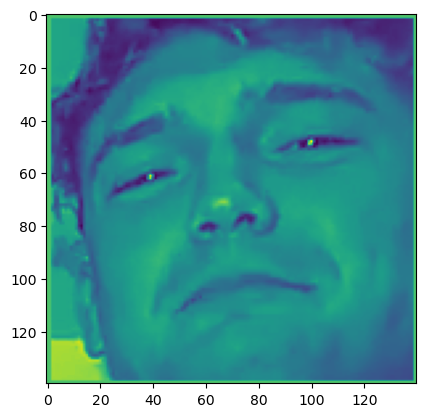

In [6]:
video_path = './videos/video.mp4'
output_path = './videos/video_proyecto.mp4'
enmarcar_y_etiquetar_caras(video_path, output_path, model_trained)
output_path = './videos/video_modelo_referencia.mp4'
enmarcar_y_etiquetar_caras(video_path, output_path, model_keggle)